# All Togehter using NetTiSA flows

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import catboost as cb
import lightgbm as lgb
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


In [2]:
_df = pd.read_csv("final_datasets/botnet_multiclass.csv")
df = _df
_df = pd.read_csv("final_datasets/decrypto_dataset_design.csv")
_df.LABEL.mask(_df.LABEL == True, "Cryptomining", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/decrypto_dataset_evaluation.csv")
_df.LABEL.mask(_df.LABEL == True, "Cryptomining", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/dns_malware.csv")
_df.LABEL.mask(_df.LABEL == True, "DNS malware", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/doh_cic.csv")
_df.LABEL.mask(_df.LABEL == True, "DoH", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/doh_real_world.csv")
_df.LABEL.mask(_df.LABEL == True, "DoH", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/edge_iiot_multiclass.csv")
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/http_bruteforce.csv")
_df = _df[_df.LABEL == True]
_df.LABEL.mask(_df.LABEL == True, "HTTPS Brute Force", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/ids_cic_multiclass.csv")
_df.LABEL.mask(_df.LABEL == "DDoS", "dos", inplace=True)
_df.LABEL.mask(_df.LABEL == "DoS GoldenEye", "dos", inplace=True)
_df.LABEL.mask(_df.LABEL == "DoS Hulk", "dos", inplace=True)
_df.LABEL.mask(_df.LABEL == "DoS Slowhttptest", "dos", inplace=True)
_df.LABEL.mask(_df.LABEL == "DoS slowloris", "dos", inplace=True)
_df.LABEL.mask(_df.LABEL == "Web Attack – Brute Force", "HTTPS Brute Force", inplace=True)
_df.LABEL.mask(_df.LABEL == "Web Attack – Sql Injection", "injection", inplace=True)
_df.LABEL.mask(_df.LABEL == "Web Attack – XSS", "XSS", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/ton_iot_mutliclass.csv")
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/tor_multiclass.csv")
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/unsw_multiclass.csv")
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/vpn_iscx_multiclass.csv")
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/vpn_vnat_multiclass.csv")
df = pd.concat([df, _df])
df.reset_index(inplace=True)
display(df)

,index,Unnamed: 0,SRC_IP,DST_IP,SRC_PORT,DST_PORT,TIME_FIRST,TIME_LAST,LABEL,PACKETS,...,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_RELATIVE_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS
0,0,0,147.32.84.165,147.32.80.9,1025,53,1.312967e+09,1.312967e+09,neris,4,...,235.084382,2.796482,0.497004,1.131372,2.276383,0.455277,6.198883e-06,2.254977,1.200000,0.666667
1,1,1,147.32.84.165,147.32.84.255,137,137,1.312967e+09,1.312967e+09,clear,38,...,125.329881,4.164066,0.428112,5.330970,12.452268,0.336548,0.000000e+00,1.763265,0.324324,1.000000
2,2,2,147.32.84.165,147.32.84.255,138,138,1.312967e+09,1.312967e+09,clear,6,...,253.565245,0.986151,0.666641,2.675396,4.013247,0.802649,1.096725e-05,4.012922,0.800000,1.000000
3,3,3,60.190.222.139,147.32.84.165.,65520,1039,1.312967e+09,1.312967e+09,clear,4,...,163.003834,1.318585,0.339969,0.866065,2.547480,0.849160,3.052201e-01,1.936479,0.666667,1.000000
4,4,4,147.32.84.165,60.190.222.139.,1039,65520,1.312967e+09,1.312967e+09,clear,10,...,76.264015,2.103153,0.283852,0.843926,2.973125,0.330347,7.152557e-06,2.353862,0.666667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20182701,43395,43395,10.123.1.2,10.123.1.1,1195,1195,1.563290e+09,1.563290e+09,STREAMING,6648,...,1165.261449,1.236943,0.691472,206.954050,299.295091,0.014725,-3.099442e-06,10.305613,0.909028,0.327069
20182702,43396,43396,10.123.1.2,10.123.1.1,1195,1195,1.563290e+09,1.563291e+09,STREAMING,3492,...,1179.357141,1.302337,0.327745,62.069691,189.384230,0.017652,-9.536743e-07,10.342798,0.892534,0.325443
20182703,43397,43397,10.123.1.2,10.123.1.1,1195,1195,1.563291e+09,1.563291e+09,STREAMING,11583,...,1178.960960,1.286381,0.358777,107.399731,299.349472,0.008157,-1.192093e-06,10.016004,0.713663,0.315622
20182704,43398,43398,10.123.1.2,10.123.1.1,1195,1195,1.563291e+09,1.563291e+09,STREAMING,7443,...,1179.036929,1.290154,0.362466,108.621344,299.672954,0.012954,0.000000e+00,10.300571,0.764589,0.321720


In [3]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "KURTOSIS",
    "TIME_DISTRIBUTION",
    "MEAN_RELATIVE_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
]

In [4]:
import sklearn
pd.set_option('display.max_columns', None)

df = df[["LABEL"] + features].copy()

for F in features:
    df.replace([np.inf], 0, inplace=True)
    df.replace([-np.inf], 0, inplace=True)
    df.loc[df[F].isnull(), F] = 0

In [5]:
df.LABEL.mask(df.LABEL == "runsomware", "ransomware", inplace=True)
df.LABEL.mask(df.LABEL == "BENIGN", "Clear", inplace=True)
df.LABEL.mask(df.LABEL == "STREAMING", "VIDEO", inplace=True)
df.LABEL.mask(df.LABEL == "clear", "Clear", inplace=True)
df.LABEL.mask(df.LABEL == "Generic", "Clear", inplace=True)
df.LABEL.mask(df.LABEL == "FILE_TRANSFER", "File Transfer", inplace=True)
df.LABEL.mask(df.LABEL == "FileTrasfer", "File Transfer", inplace=True)
df.LABEL.mask(df.LABEL == "FILE TRANSFER", "File Transfer", inplace=True)
df.LABEL.mask(df.LABEL == "ddos", "dos", inplace=True)
df.LABEL.mask(df.LABEL == "xss", "XSS", inplace=True)
df.LABEL.mask(df.LABEL == "SQL_injection", "injection", inplace=True)
df.LABEL.mask(df.LABEL == "voip", "VOIP", inplace=True)
df.LABEL.mask(df.LABEL == "port_scanning", "scanning", inplace=True)
df.LABEL.mask(df.LABEL == "password", "password_attack", inplace=True)
df.LABEL.mask(df.LABEL == "DoS", "dos", inplace=True)
df.LABEL.mask(df.LABEL == "MAIL", "EMAIL", inplace=True)



df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes

In [6]:
classifications_array = []
for index, row in df[["LABEL", "LABEL_code"]].drop_duplicates().iterrows():
    classifications_array.append(row[0])
classifications_array

['neris',
 'Clear',
 'rbot',
 'fast_flux',
 'donbot',
 'sogou',
 'qvod',
 'Cryptomining',
 'DNS malware',
 'DoH',
 'backdoor',
 'dos',
 'mitm',
 'os_fingerprinting',
 'password_attack',
 'scanning',
 'ransomware',
 'injection',
 'uploading_attack',
 'vulnerability_scanner',
 'XSS',
 'HTTPS Brute Force',
 'Bot',
 'PortScan',
 'Infiltration',
 'FTP-Patator',
 'SSH-Patator',
 'Heartbleed',
 'AUDIO',
 'BROWSING',
 'CHAT',
 'File Transfer',
 'EMAIL',
 'P2P',
 'VIDEO',
 'VOIP',
 'Fuzzers',
 'Exploits',
 'Shellcode',
 'Worms',
 'Reconnaissance',
 'Backdoor',
 'Analysis',
 'C2']

In [7]:
df = df[features + ["LABEL_code"]]

In [8]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    try:
        indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
        return df[indices_to_keep].astype(np.float64)
    except: 
        return df

df = clean_dataset(df)

In [9]:
df.shape

(20182706, 25)

In [10]:
df.LABEL_code.value_counts()

7.0     9252680
10.0    5442232
27.0    1507750
30.0    1132797
8.0     1088073
36.0     546904
32.0     412909
40.0     350706
28.0      67843
19.0      60443
2.0       47813
12.0      44702
16.0      41126
15.0      26998
14.0      22995
38.0      22660
5.0       17200
25.0      16323
21.0      12570
6.0        9379
24.0       8469
13.0       7982
34.0       6332
22.0       5960
43.0       5219
33.0       4981
31.0       4367
0.0        3698
42.0       2634
4.0        2470
20.0       1611
23.0       1353
11.0        954
1.0         761
3.0         590
37.0        286
35.0        278
26.0        262
9.0         257
39.0         55
18.0         44
29.0         27
17.0         10
41.0          3
Name: LABEL_code, dtype: int64

In [11]:
df_validation = df.sample(n = 10000000)
df_features =  df[~df.isin(df_validation)].dropna()

In [12]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [13]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred,average='weighted')
        if verbose is True:
            print ("SCORE:", accuracy, "  ", space)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 50, 5),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1),
        'n_estimators': hp.quniform('n_estimators', 50, 400, 50),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [1]:
best_hyperparams = tunne_together_XGBoost_classification(df_features.sample(n = 500000), features, verbose=False)
best_hyperparams

{'colsample_bytree': 0.058444263782066797,
 'gamma': 3.408204388199506,
 'max_depth': 30.0,
 'min_child_weight': 8.0,
 'n_estimators': 300.0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.266728028338203}

In [16]:
X=df_features[features]  # Features
y=df_features['LABEL_code']  # Labels
model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
        )
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=3.408204388199506,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=30, max_leaves=0, min_child_weight=8,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

                       precision    recall  f1-score   support

                neris     0.8110    0.5082    0.6248      1832
                Clear     0.0000    0.0000    0.0000       372
                 rbot     0.8470    0.5388    0.6586     23703
            fast_flux     0.6774    0.1333    0.2228       315
               donbot     0.8728    0.6050    0.7146      1248
                sogou     0.9875    0.9536    0.9702      8509
                 qvod     0.9612    0.7900    0.8672      4638
         Cryptomining     0.9649    0.9565    0.9607   4586141
          DNS malware     0.9975    0.9965    0.9970    538473
                  DoH     0.9545    0.7955    0.8678       132
             backdoor     0.9242    0.9615    0.9425   2695697
                  dos     0.9227    0.3996    0.5577       478
                 mitm     0.6267    0.5451    0.5831     22125
    os_fingerprinting     0.9881    0.9943    0.9912      4017
      password_attack     0.9759    0.8789    0.9249  

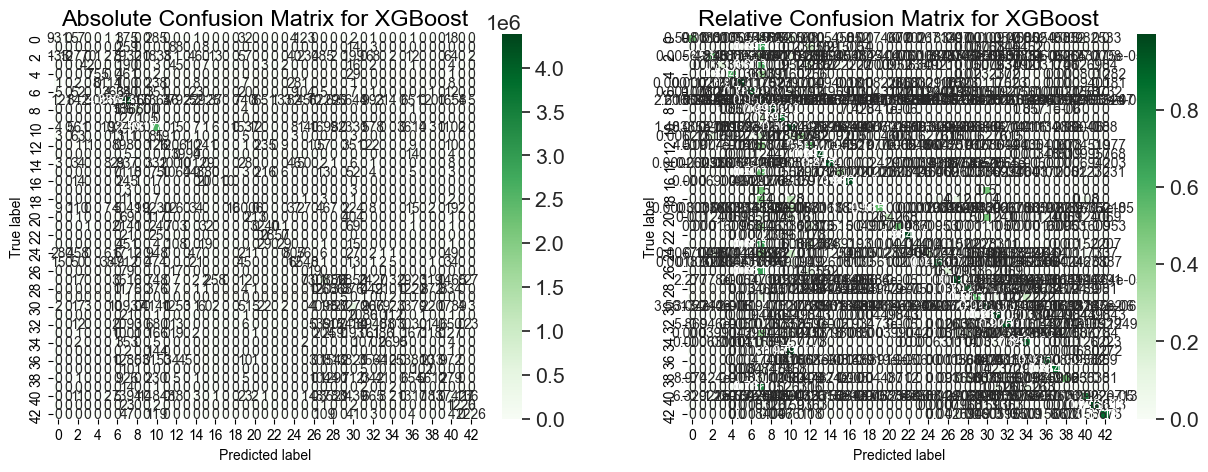

In [30]:
X_validation = df_validation[features]  # Features
y_validation = df_validation['LABEL_code']  # Labels
y_pred = model.predict(X_validation)

print(classification_report(y_validation, y_pred, target_names=classifications_array,digits=4, labels=sorted(pd.DataFrame(y_pred)[0].unique())))

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

# Feature importance

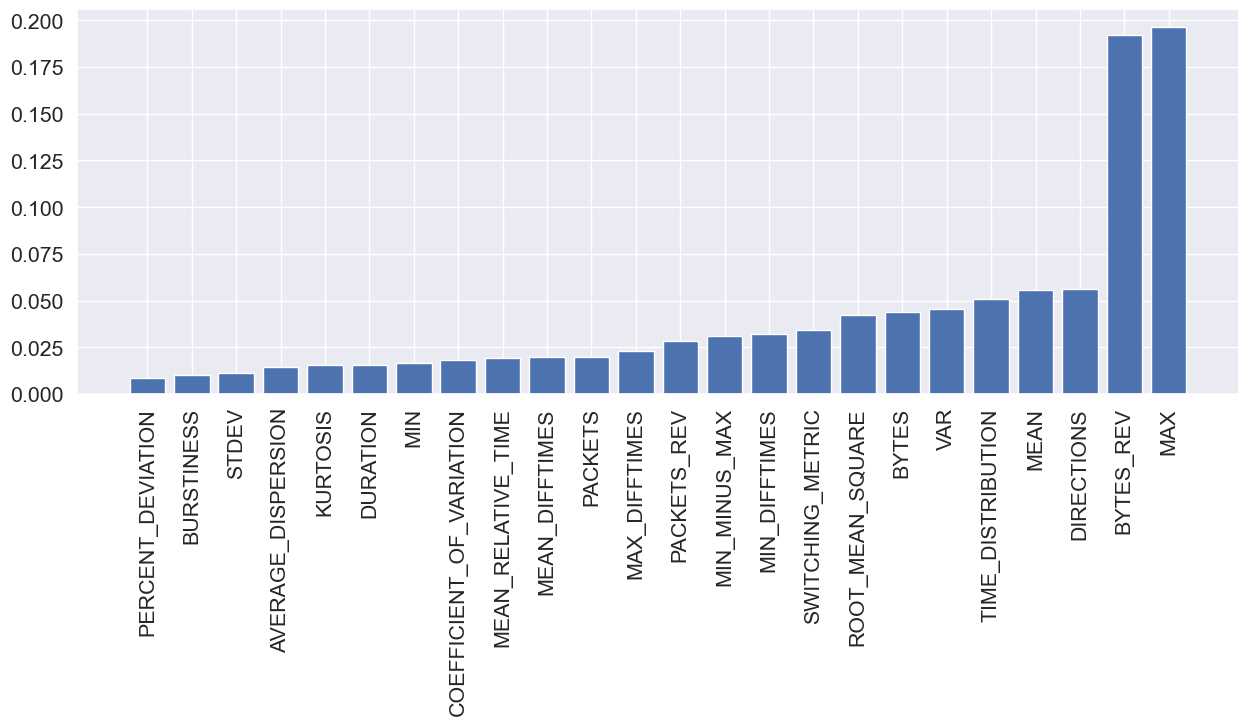

In [31]:
feat_importances = pd.Series(model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [32]:
feat_importances.to_dict()

{'PERCENT_DEVIATION': 0.008554300293326378,
 'BURSTINESS': 0.010410599410533905,
 'STDEV': 0.01131596602499485,
 'AVERAGE_DISPERSION': 0.014660097658634186,
 'KURTOSIS': 0.015385710634291172,
 'DURATION': 0.01565507799386978,
 'MIN': 0.01635792665183544,
 'COEFFICIENT_OF_VARIATION': 0.018023960292339325,
 'MEAN_RELATIVE_TIME': 0.019205229356884956,
 'MEAN_DIFFTIMES': 0.0197531096637249,
 'PACKETS': 0.02005668729543686,
 'MAX_DIFFTIMES': 0.023165734484791756,
 'PACKETS_REV': 0.028171738609671593,
 'MIN_MINUS_MAX': 0.030839424580335617,
 'MIN_DIFFTIMES': 0.03192979469895363,
 'SWITCHING_METRIC': 0.03427335247397423,
 'ROOT_MEAN_SQUARE': 0.04221474751830101,
 'BYTES': 0.043781667947769165,
 'VAR': 0.04526500031352043,
 'TIME_DISTRIBUTION': 0.050780024379491806,
 'MEAN': 0.05557890608906746,
 'DIRECTIONS': 0.056312307715415955,
 'BYTES_REV': 0.19213035702705383,
 'MAX': 0.19617831707000732}